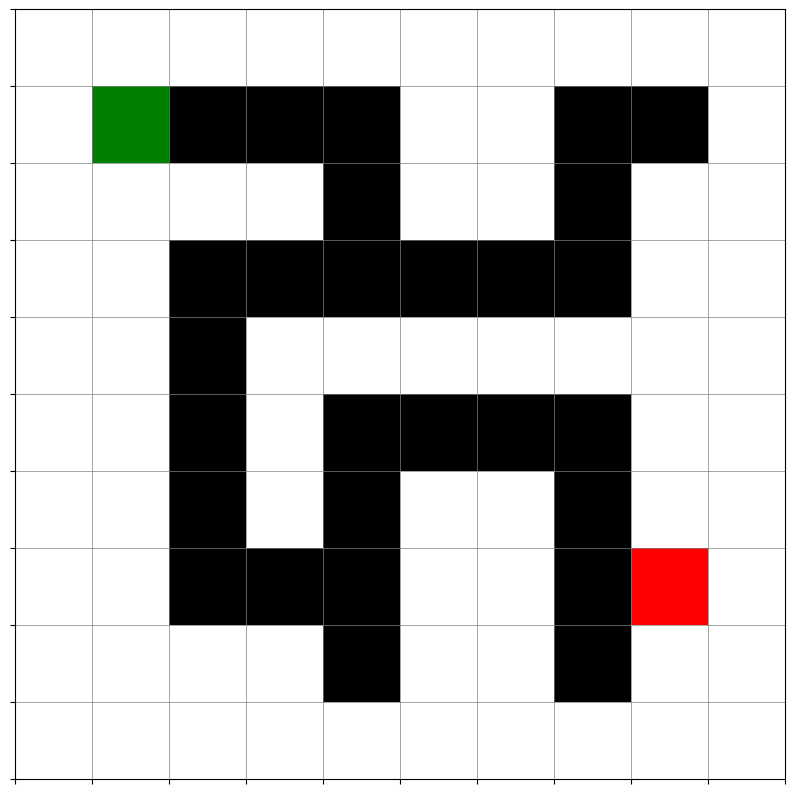

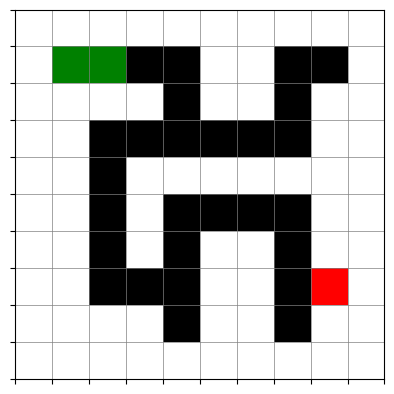

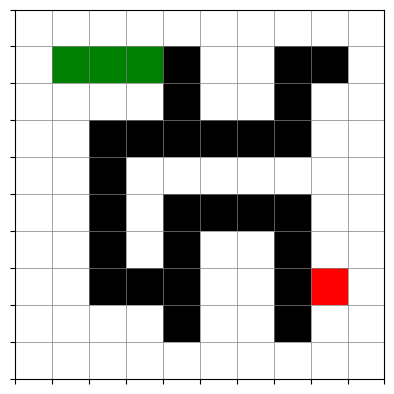

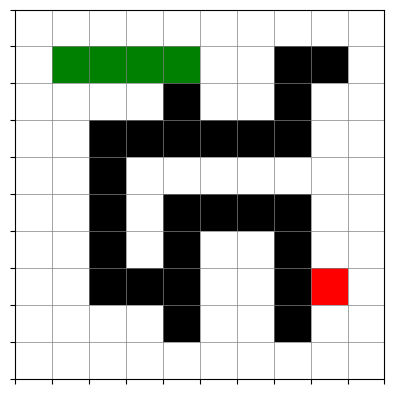

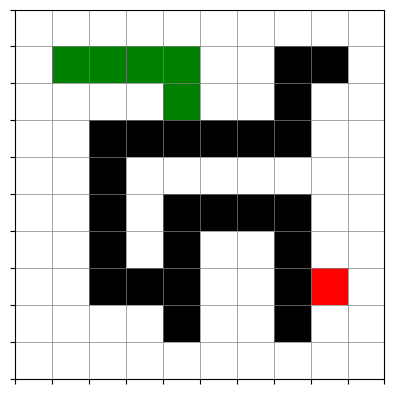

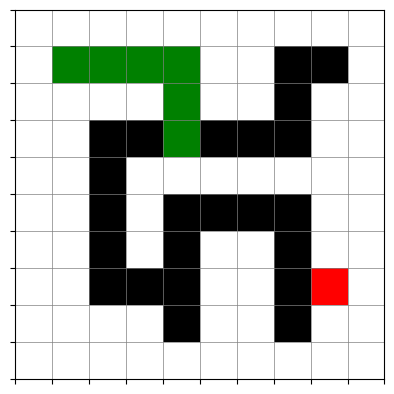

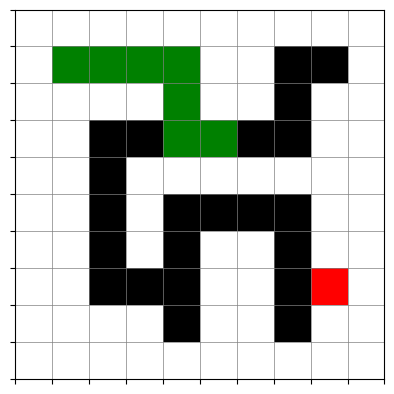

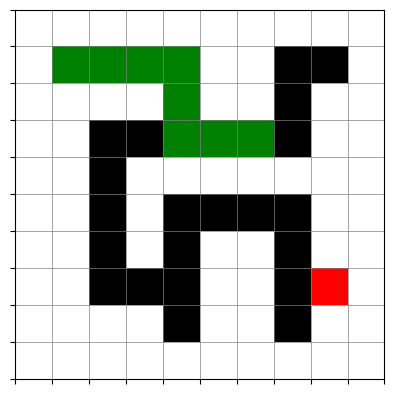

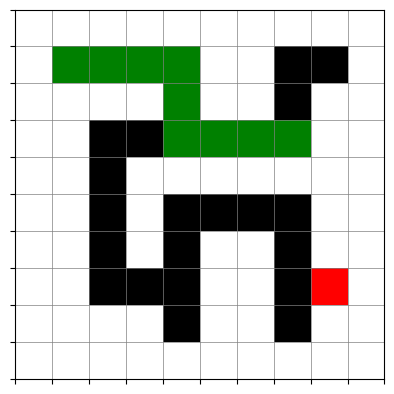

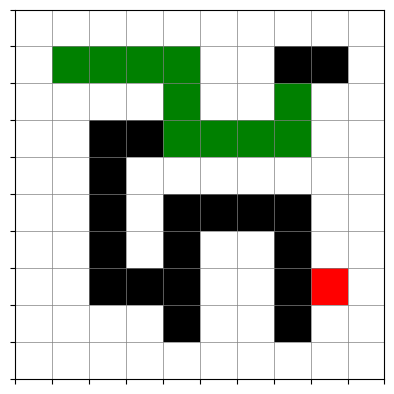

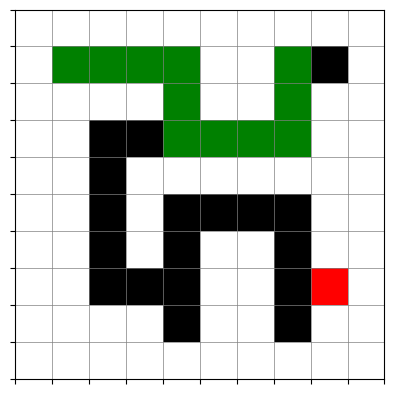

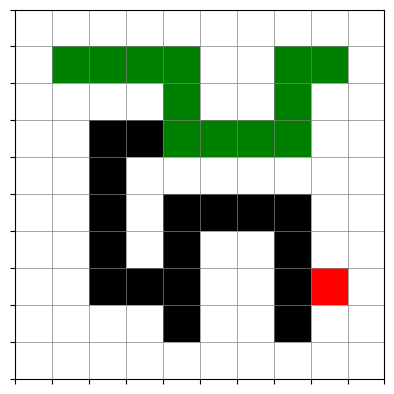

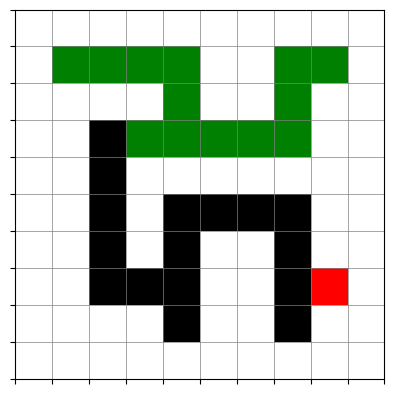

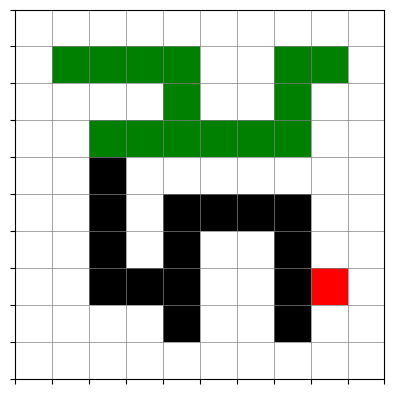

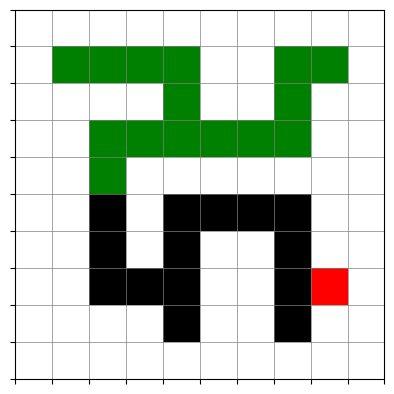

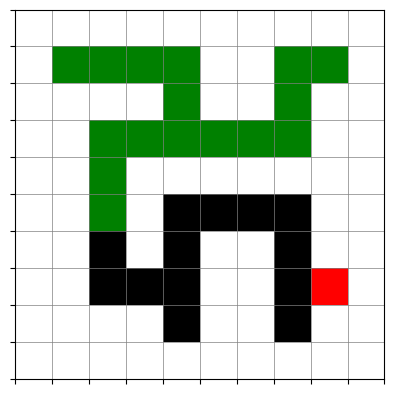

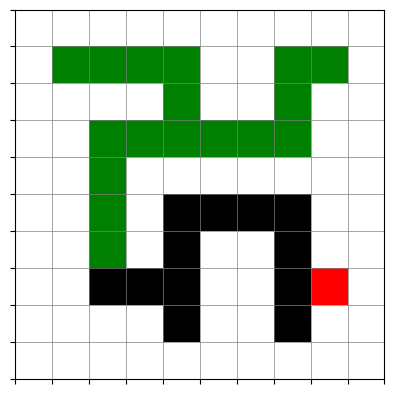

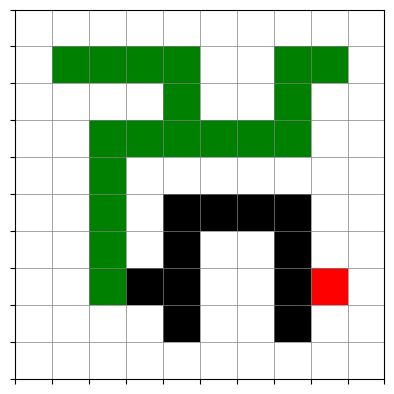

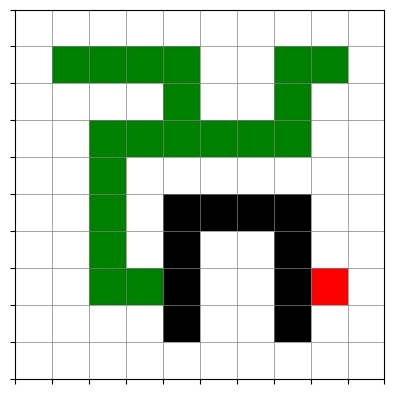

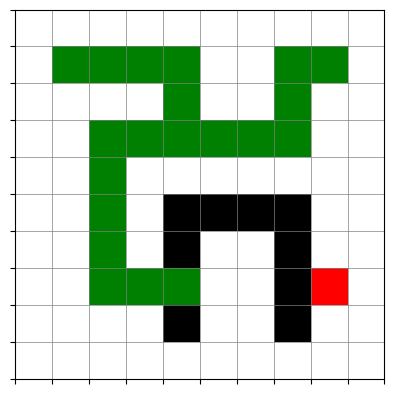

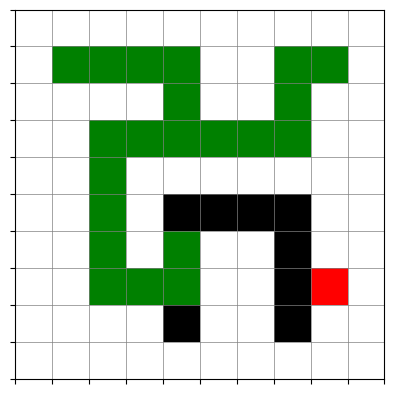

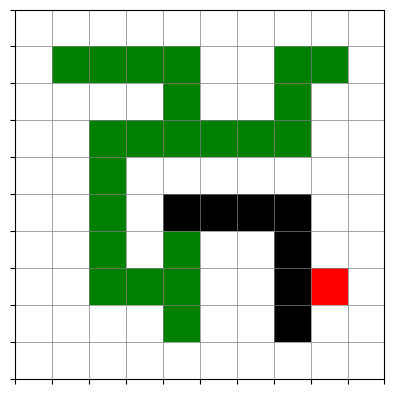

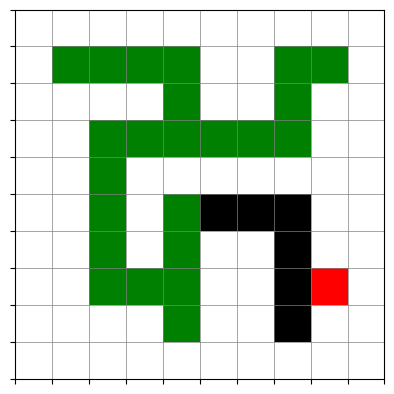

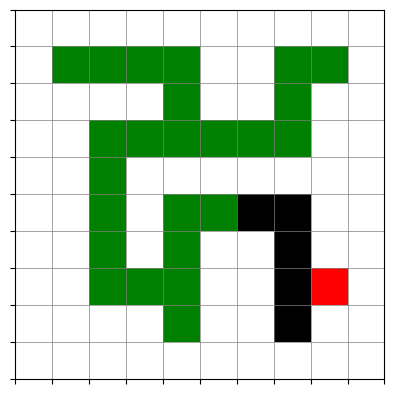

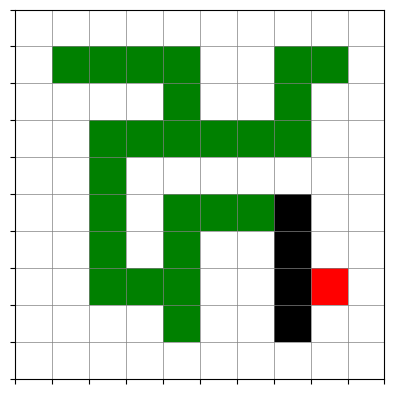

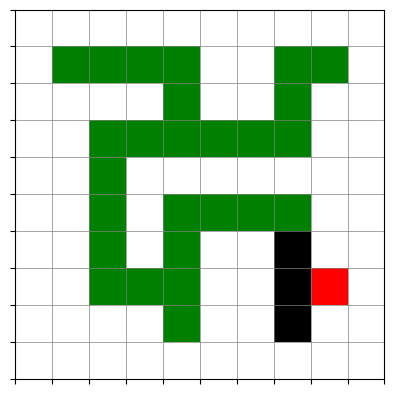

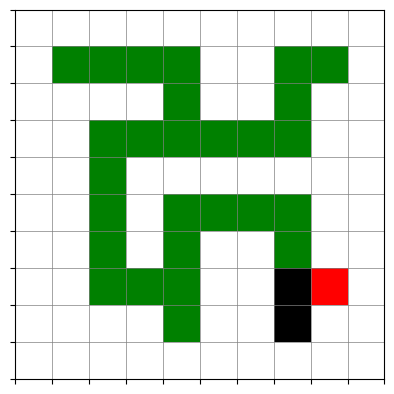

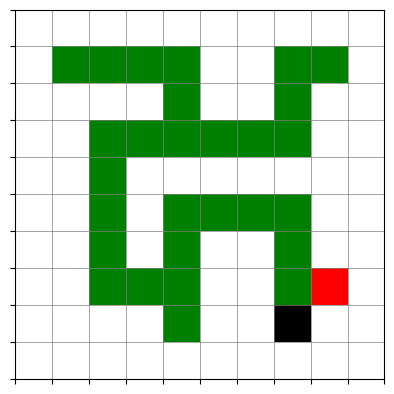

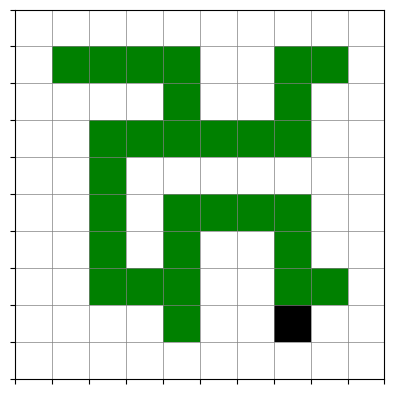

Algorithm used = "GBFS" , Path cost = 21 , No of moves utilized = 28


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

# initialising necessary global variables
starting_grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 3, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])  # 0 = empty spaces or paths that cannot be traversed 1 = Represents traversable paths 2 = starting, 3 = goal
grid_rows, grid_columns = starting_grid.shape
goal_row, goal_column = np.where(starting_grid == 3)  # 3 indicates goal point
goal_row, goal_column = int(goal_row), int(goal_column)


class Node:
    def __init__(self, row, column, parent, operator, moves):
        self.row = row
        self.column = column
        self.parent = parent
        self.operator = operator
        self.moves = moves
        if row is not None and column is not None:
            self.heuristic = abs(row - goal_row) + abs(column - goal_column)

    # Sort nodes
    def __lt__(self, other):
        return self.heuristic < other.heuristic

    # Compare nodes
    def __eq__(self, other):
        return self.row == other.row and self.column == other.column


# function to create a node
def create_node(row, column, parent, operator, moves):
    return Node(row, column, parent, operator, moves)


# function to move up, left, right, down if it's doable
def expand_node(node, visited):
    expanded_nodes = [
        create_node(move_up(node.row, node.column, visited), node.column, node, "Up", node.moves + 1),
        create_node(node.row, move_left(node.row, node.column, visited), node, "Left", node.moves + 1),
        create_node(node.row, move_right(node.row, node.column, visited), node, "Right", node.moves + 1),
        create_node(move_down(node.row, node.column, visited), node.column, node, "Down", node.moves + 1)
    ]
    expanded_nodes = [node for node in expanded_nodes if node.row is not None and node.column is not None]
    return expanded_nodes


# check if the position is already visited or not
def isVisited(row, column, visited):
    for i in visited:  # checking if node is already visited or not
        if i.row == row and i.column == column:
            return True
    return False


# function to move left if it's doable
def move_left(row, column, visited):
    if column != 0 and starting_grid[row][column - 1] in [1, 3] and not isVisited(row, column - 1, visited):
        return column - 1
    return None


# function to move right if it's doable
def move_right(row, column, visited):
    if column != grid_columns - 1 and starting_grid[row][column + 1] in [1, 3] and not isVisited(row, column + 1, visited):
        return column + 1
    return None


# function to move up if it's doable
def move_up(row, column, visited):
    if row != 0 and starting_grid[row - 1][column] in [1, 3] and not isVisited(row - 1, column, visited):
        return row - 1
    return None


# function to move down if it's doable
def move_down(row, column, visited):
    if row != grid_rows - 1 and starting_grid[row + 1][column] in [1, 3] and not isVisited(row + 1, column, visited):
        return row + 1
    return None


# Visualization function
def visualize_maze(current_grid):
    cmap = colors.ListedColormap(['white', 'black', 'blue', 'red', 'green'])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(current_grid, cmap=cmap, norm=norm)
    plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(-0.5, grid_columns, 1), [])
    plt.yticks(np.arange(-0.5, grid_rows, 1), [])
    plt.pause(0.5)


# GBFS search
def GBFS(starting_row, starting_column):
    # Create lists for open nodes and closed nodes
    open = []
    visited = []

    # Create a start node and an goal node
    start_node = create_node(starting_row, starting_column, None, None, 0)

    # Add the start node
    open.append(start_node)

    # Create cost variable to find total moves utilized
    cost = -1

    # Loop until the open list is empty
    while open:
        # Sort the open list to get the node with the lowest cost first
        open.sort()

        # Get the node with the lowest cost
        current_node = open.pop(0)

        # counting total moves
        if current_node not in visited:
            cost += 1

        # Add the current node to the closed list
        visited.append(current_node)

        # Visualize the current state of the maze
        current_grid = starting_grid.copy()
        for node in visited:
            current_grid[node.row, node.column] = 4
        current_grid[current_node.row, current_node.column] = 5
        visualize_maze(current_grid)

        # Check if we have reached the goal, return the path (From Current Node to Start Node By Node.parent)
        if current_node.row == goal_row and current_node.column == goal_column:
            # Print costs and return True
            print('Algorithm used = "GBFS" , ', end='')
            print("Path cost =", current_node.moves, ', No of moves utilized =', cost)
            return True

        # Get neighbours
        neighbors = expand_node(current_node, visited)

        # Loop neighbors
        for neighbor in neighbors:
            # Check if the neighbor is in the closed list
            if neighbor in visited:
                continue

            # Check if neighbor is in open list and if it has a lower f value
            if In_Open(open, neighbor):
                # Everything is green, add neighbor to open list
                open.append(neighbor)

    # Return None, no path is found
    return None


# Check if a neighbor should be added to open list
def In_Open(open, neighbor):
    for node in open:
        if neighbor == node and neighbor.heuristic >= node.heuristic:
            return False
    return True


def main():
    # initialising starting coordinates and goal coordinates
    starting_row, starting_column = np.where(starting_grid == 2)  # 2 indicates starting point
    starting_row, starting_column = int(starting_row), int(starting_column)

    # Initialize plot
    plt.figure(figsize=(10, 10))
    plt.ion()

    # calling functions and displaying output
    if GBFS(starting_row, starting_column) is None:
        print("No solution found using GBFS.")
    
    plt.ioff()
    plt.show()

if __name__ == "__main__":
    main()


In [10]:
class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic
        self.children = []

    def add_child(self, child, cost):
        self.children.append((child, cost))

def greedy_best_first_search(start_node, goal_node):
    open_list = [(start_node, 0)]
    closed_list = []

    while open_list:
        current_node, current_cost = open_list.pop(0)
        closed_list.append(current_node)

        if current_node.name == goal_node.name:
            path = []
            total_cost = current_cost
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent if hasattr(current_node, 'parent') else None
            return path[::-1], total_cost

        for child, cost in current_node.children:
            if child not in open_list and child not in closed_list:
                child.parent = current_node
                open_list.append((child, current_cost + cost))

        open_list.sort(key=lambda node: node[0].heuristic)

    return None, float('inf')

# Define the graph structure
graph_structure = {
    'S': {'heuristic': 13, 'children': {'A': 3, 'B': 2}},
    'A': {'heuristic': 12, 'children': {'C': 4, 'D': 1}},
    'B': {'heuristic': 4, 'children': {'E': 3, 'F': 1}},
    'C': {'heuristic': 7, 'children': {}},
    'D': {'heuristic': 3, 'children': {}},
    'E': {'heuristic': 8, 'children': {'H': 5}},
    'F': {'heuristic': 2, 'children': {'I': 2, 'G': 3}},
    'H': {'heuristic': 4, 'children': {}},
    'I': {'heuristic': 9, 'children': {}},
    'G': {'heuristic': 0, 'children': {}}
}

# Create nodes
nodes = {name: Node(name, data['heuristic']) for name, data in graph_structure.items()}

# Create edges
for name, data in graph_structure.items():
    node = nodes[name]
    for child_name, cost in data['children'].items():
        node.add_child(nodes[child_name], cost)

# Perform Greedy Best-First Search
start_node = nodes['S']
goal_node = nodes['G']
path, path_cost = greedy_best_first_search(start_node, goal_node)
print("Path found:", path)
print("Path cost:", path_cost)


Path found: ['S', 'B', 'F', 'G']
Path cost: 6


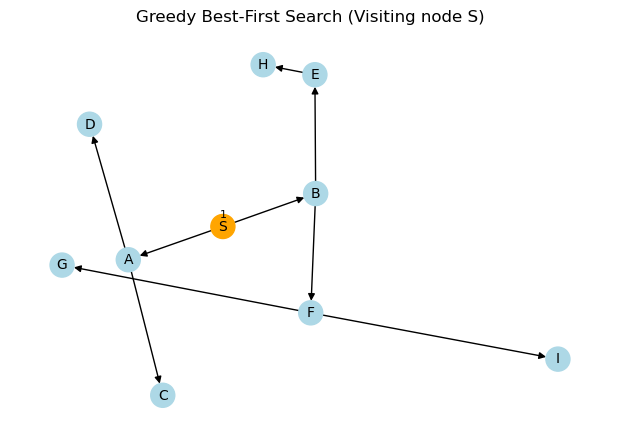

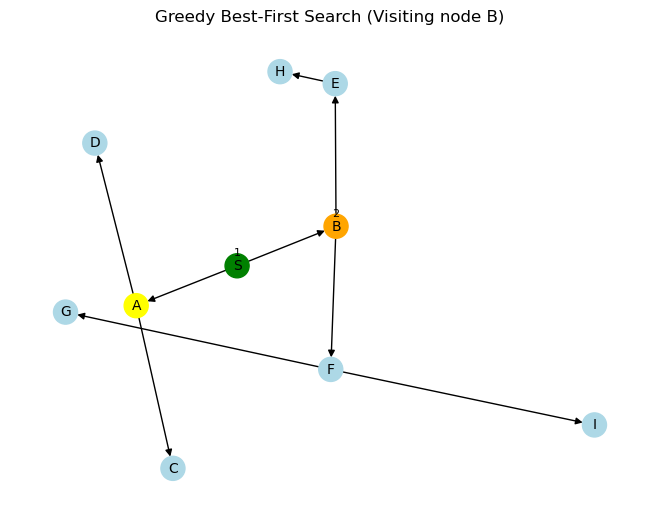

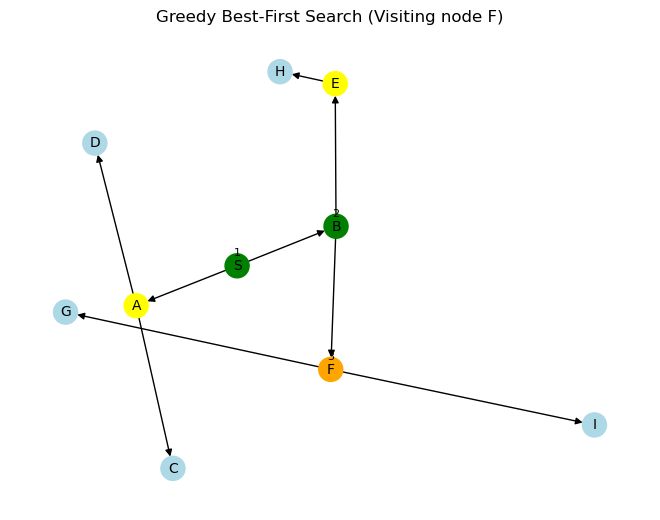

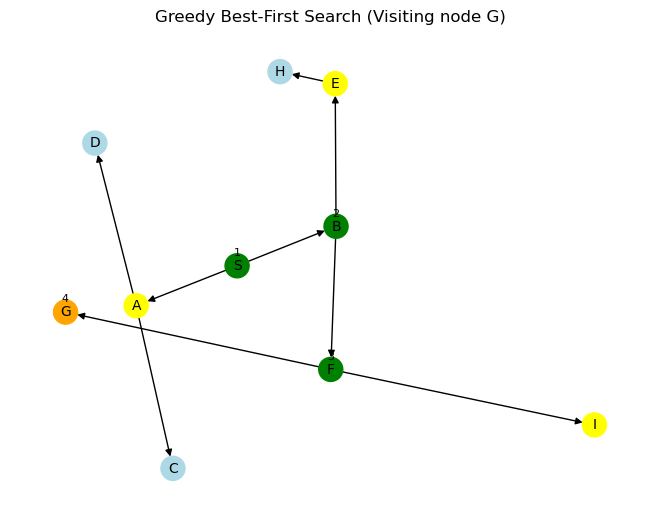

Path found: ['S', 'B', 'F', 'G']
Path cost: 6


In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from tabulate import tabulate

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic
        self.children = []

    def add_child(self, child, cost):
        self.children.append((child, cost))

def greedy_best_first_search(start_node, goal_node):
    open_list = [(start_node, 0)]
    closed_list = []
    steps = []
    statuses = {node.name: [] for node in nodes.values()}
    visit_count = 0

    plt.figure(figsize=(6, 4))  # Smaller figure size
    pos = nx.spring_layout(G)

    while open_list:
        current_node, current_cost = open_list.pop(0)
        closed_list.append(current_node)

        visit_count += 1
        colors = ['orange' if nodes[node] == current_node else
                  'yellow' if nodes[node] in [n[0] for n in open_list] else
                  'green' if nodes[node] in closed_list else 'lightblue' 
                  for node in G.nodes()]

        nx.draw(G, pos, with_labels=True, node_color=colors, node_size=300, font_size=10)  # Smaller node size and font size

        for v in closed_list:
            x, y = pos[v.name]
            plt.text(x, y + 0.05, str(closed_list.index(v) + 1), fontsize=8, ha='center', color='black')  # Smaller text size

        plt.title(f"Greedy Best-First Search (Visiting node {current_node.name})", fontsize=12)  # Smaller title font size
        plt.pause(1)

        step_info = {
            'Current Node': current_node.name,
            'Cost': current_cost,
            'OPEN List': ' '.join([node[0].name for node in open_list]),
            'CLOSED List': ' '.join([node.name for node in closed_list])
        }
        steps.append(step_info)
        for node in statuses:
            statuses[node].append(visit_count if nodes[node] in closed_list else '-')

        if current_node.name == goal_node.name:
            path = []
            total_cost = current_cost
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent if hasattr(current_node, 'parent') else None
            plt.show()
            return path[::-1], total_cost

        for child, cost in current_node.children:
            if child not in open_list and child not in closed_list:
                child.parent = current_node
                open_list.append((child, current_cost + cost))

        open_list.sort(key=lambda node: node[0].heuristic)

    plt.show()
    return None, float('inf')

# Define the graph structure
graph_structure = {
    'S': {'heuristic': 13, 'children': {'A': 3, 'B': 2}},
    'A': {'heuristic': 12, 'children': {'C': 4, 'D': 1}},
    'B': {'heuristic': 4, 'children': {'E': 3, 'F': 1}},
    'C': {'heuristic': 7, 'children': {}},
    'D': {'heuristic': 3, 'children': {}},
    'E': {'heuristic': 8, 'children': {'H': 5}},
    'F': {'heuristic': 2, 'children': {'I': 2, 'G': 3}},
    'H': {'heuristic': 4, 'children': {}},
    'I': {'heuristic': 9, 'children': {}},
    'G': {'heuristic': 0, 'children': {}}
}

# Create nodes
nodes = {name: Node(name, data['heuristic']) for name, data in graph_structure.items()}

# Create edges
for name, data in graph_structure.items():
    node = nodes[name]
    for child_name, cost in data['children'].items():
        node.add_child(nodes[child_name], cost)

# Create a graph using NetworkX
G = nx.DiGraph()
for name, data in graph_structure.items():
    for child_name in data['children']:
        G.add_edge(name, child_name)

# Perform Greedy Best-First Search
start_node = nodes['S']
goal_node = nodes['G']

plt.ion()
path, path_cost = greedy_best_first_search(start_node, goal_node)
plt.ioff()
plt.show()

print("Path found:", path)
print("Path cost:", path_cost)


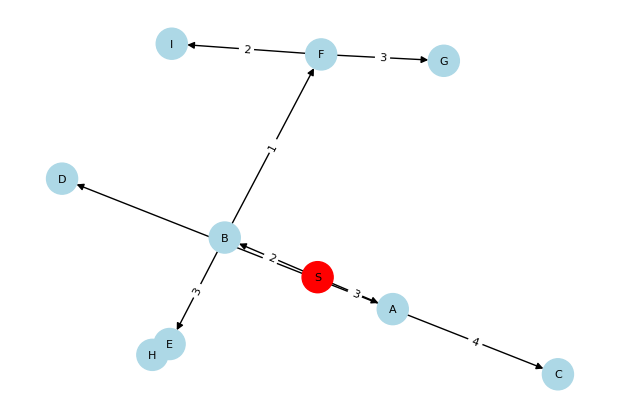

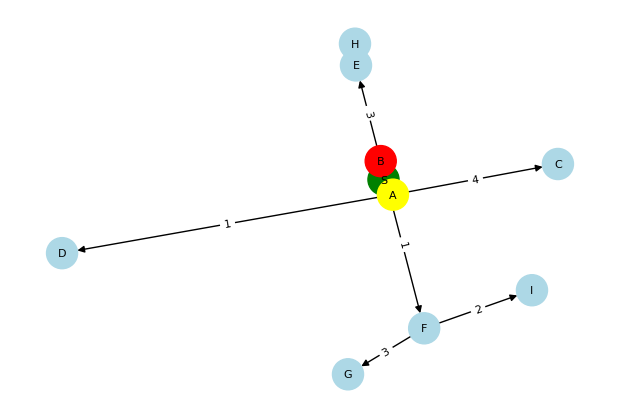

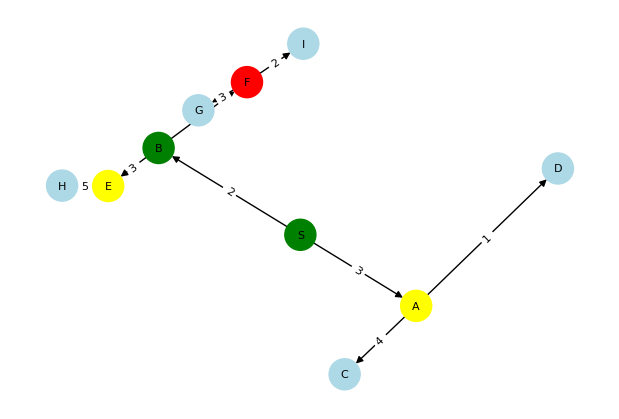

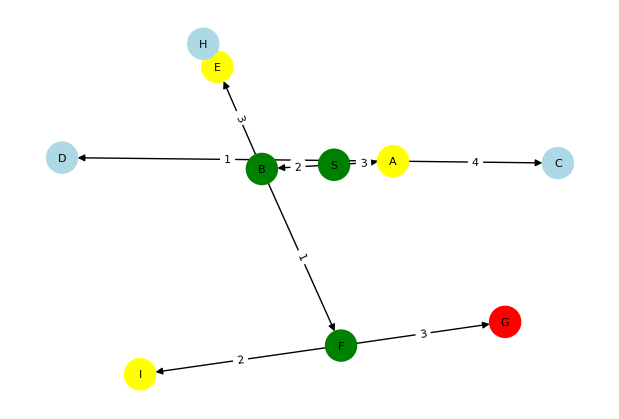

Path found: ['S', 'B', 'F', 'G']
Path cost: 6


In [14]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic
        self.children = []

    def add_child(self, child, cost):
        self.children.append((child, cost))

def greedy_best_first_search(start_node, goal_node):
    open_list = [(start_node, 0)]
    closed_list = []

    while open_list:
        current_node, current_cost = open_list.pop(0)
        closed_list.append(current_node)

        visualize_graph(graph_structure, nodes, open_list, closed_list, current_node)

        if current_node.name == goal_node.name:
            path = []
            total_cost = current_cost
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent if hasattr(current_node, 'parent') else None
            return path[::-1], total_cost

        for child, cost in current_node.children:
            if child not in open_list and child not in closed_list:
                child.parent = current_node
                open_list.append((child, current_cost + cost))

        open_list.sort(key=lambda node: node[0].heuristic)

    return None, float('inf')

def visualize_graph(graph_structure, nodes, open_list, closed_list, current_node):
    G = nx.DiGraph()
    for name, data in graph_structure.items():
        G.add_node(name, heuristic=data['heuristic'])
        for child_name, cost in data['children'].items():
            G.add_edge(name, child_name, weight=cost)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(6, 4))  # Smaller figure size
    node_colors = []
    for node in G.nodes():
        if nodes[node] == current_node:
            node_colors.append('red')
        elif nodes[node] in [n[0] for n in open_list]:
            node_colors.append('yellow')
        elif nodes[node] in closed_list:
            node_colors.append('green')
        else:
            node_colors.append('lightblue')

    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8)  # Smaller node size and font size
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)  # Smaller font size for edge labels
    
    plt.show()
    plt.pause(1)

# Define the graph structure
graph_structure = {
    'S': {'heuristic': 13, 'children': {'A': 3, 'B': 2}},
    'A': {'heuristic': 12, 'children': {'C': 4, 'D': 1}},
    'B': {'heuristic': 4, 'children': {'E': 3, 'F': 1}},
    'C': {'heuristic': 7, 'children': {}},
    'D': {'heuristic': 3, 'children': {}},
    'E': {'heuristic': 8, 'children': {'H': 5}},
    'F': {'heuristic': 2, 'children': {'I': 2, 'G': 3}},
    'H': {'heuristic': 4, 'children': {}},
    'I': {'heuristic': 9, 'children': {}},
    'G': {'heuristic': 0, 'children': {}}
}

# Create nodes
nodes = {name: Node(name, data['heuristic']) for name, data in graph_structure.items()}

# Create edges
for name, data in graph_structure.items():
    node = nodes[name]
    for child_name, cost in data['children'].items():
        node.add_child(nodes[child_name], cost)

# Perform Greedy Best-First Search
start_node = nodes['S']
goal_node = nodes['G']

plt.ion()
path, path_cost = greedy_best_first_search(start_node, goal_node)
plt.ioff()
plt.show()

print("Path found:", path)
print("Path cost:", path_cost)
